# 88-Inch Foil Activation Experiment to Measure ETA Neutron Spectrum

The source was 33 MeV deuteron break-up on Ta.

This notebook contains the code necessary to generate STAYSL inputs, a description on how to run STAYSL, and the anaysis and plotting of the resulting outputs.  

## BCF

The STASYL BCF input files are generated from the recoded beam current monitor files stores at:

In [1]:
from Support.Utilities import check_path

bcmPath = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/BCM/ETA_Trimmed.bcm'
check_path(bcmPath)

The file exists at: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/BCM/ETA_Trimmed.bcm


True

The file used is a modified version of the BCM created file where pre and post calibrations are removed from the file; only the actual irradiation measurements are included.

Support for generating the BCF input files can be found in the [PyScripts Repo](http://github.com/jamesbevins/PyScripts). 

In [2]:
from Unfolding.STAYSL import bcmToBCF

bcfPath = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/ETA/BCF/flux_history.dat'
bcmToBCF(bcmPath, bcfPath)

The total measurement time was 70418.0 seconds with an integrated measurement of 0.759992152.


The BCF file will be placed at the path indicated above.  The BCF code can be executed by double clicking on the BCF executable and typing in the BCF input file name.

## SHIELD

SHIELD requires a fine group cross section file.  For this, the [14468 group shield cross sections](https://github.com/SlaybaughLab/88_Data/tree/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/SHIELD/shld_xsect.out) were used.

NOTE: SHIELD is only valid/necessary for non-threshold reactions.

The course group structure is specified in the [shldengrp.dat](https://github.com/SlaybaughLab/88_Data/tree/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/SHIELD/shldengrp.dat) file, but this is not required with STAYSL PNNL v 1.2.0.

The [input file](https://github.com/SlaybaughLab/88_Data/tree/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/SHIELD/shldinput.dat) was generated using as measured quantities found in the [foil dimensions spreadsheet](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/BeamOnlyData/BeamFoilDimensions.xlsx).

SHIELD is ran by double clicking the SHIELD executable located in the same directory as the input files.

## SigPhi Calculator

The [SigPhi Calculator](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/SigPhi_Calculator/SigPhi_Calculator_1.2_CleanBeam.xlsm) was filled in with data from the [foil dimensions spreadsheet](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/BeamOnlyData/BeamFoilDimensions.xlsx), [BCF output](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/BCF/flux_history.out), and the [experimental analysis data](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/33MeV_ETA_Activation_Analysis.pdf).

** Note: the activities are in units of Bq/g and were adjusted as such from the calculated $A_0$ values **

The integral fluxes were calculated using a [STAYSL FIR Run](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/SigPhi_Calculator/FIR).  Once the FIR run is created, the integral flux can be calculated from the code segment below and entered into the SigPhi Calculator.

In [3]:
from Unfolding.STAYSL import integralXSecEst

firPath = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/ETA/SigPhi_Calculator/FIR/'

integralXSecEst(firPath, numRx=6)

The epithermal/thermal ratio is: 171.509974734

AU197G
The > 0.1 flux weighted sigma is: 0.0676332206455
The > 1 flux weighted sigma is: 0.0192244375137
AL27P
The > 0.1 flux weighted sigma is: 0.0219491979955
The > 1 flux weighted sigma is: 0.0219491979955
AL27A
The > 0.1 flux weighted sigma is: 0.0243749813843
The > 1 flux weighted sigma is: 0.0243749813843
NI582
The > 0.1 flux weighted sigma is: 0.00524730850596
The > 1 flux weighted sigma is: 0.00524730850596
IN115N
The > 0.1 flux weighted sigma is: 0.119558244971
The > 1 flux weighted sigma is: 0.112587699734
AU1972
The > 0.1 flux weighted sigma is: 0.386506230663
The > 1 flux weighted sigma is: 0.386506230663
AU197G
The > 0.1 flux weighted sigma is: 0.0676332206455
The > 1 flux weighted sigma is: 0.0192244375137


## STAYSL_PNNL

The STAYSL_PNNL input file was created from the [SigPhi Calculator](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/SigPhi_Calculator/SigPhi_Calculator_1.2_CleanBeam.xlsm) and [MCNP simulation results]().

Default values for covariance data using Gaussian formalism were used.

The [SHIELD library input file](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/sshldlib.dat) is an appropriately named copy of the [SHIELD ouput file](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/SHIELD/shldinput.out).

The flux normalization factor (TNORM) for the MCNP flux was calculated using the [Beam Calcs spreadsheet](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/ETA_88_BeamCalcs.xlsx) and experimental data.

To get the flux and flux uncertainty data from the MCNP output into STAYSL format:

In [4]:
from GeneralNuclear.MCNP import read_tally
from Unfolding.STAYSL import stayslFlux

simPath = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Simulated/Activation/33MeVTa/ETA/Model/33MeVTaETA_Foil_tgt.o'
check_path(simPath)

(tallyFrame, tallyTot, uncertTot) = read_tally(simPath, 214, readGroups=True, splitTally=False)

stayslFlux(tallyFrame)

The file exists at: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Simulated/Activation/33MeVTa/ETA/Model/33MeVTaETA_Foil_tgt.o
The flux:
 4.3246e-12 6.0587e-10 2.4546e-09 6.6367e-09 4.7012e-09 3.1485e-09 2.1096e-09 
 1.1666e-09 1.2021e-09 1.2171e-09 1.2453e-09 1.1714e-09 1.1056e-09 1.1116e-09 
 1.3249e-09 1.7016e-09 1.6005e-09 1.5994e-09 1.7895e-09 1.8499e-09 2.0994e-09 
 2.6992e-09 2.1615e-09 2.2127e-09 1.5241e-09 2.3606e-09 1.9385e-09 1.8728e-09 
 1.9367e-09 2.5152e-09 2.8144e-09 2.2533e-09 3.1510e-09 3.4373e-09 3.5032e-09 
 5.2890e-09 5.0536e-09 7.9838e-09 7.5488e-09 1.1583e-08 1.5385e-08 2.6700e-08 
 2.5878e-08 3.1892e-08 6.1346e-08 8.5300e-08 6.8842e-08 1.3857e-07 1.7171e-07 
 3.2659e-07 2.7295e-07 3.9856e-07 3.4138e-07 4.4059e-07 3.9905e-07 4.7414e-07 
 5.1854e-07 4.1017e-07 5.8637e-07 5.8701e-07 6.9848e-07 7.4914e-07 7.9537e-07 
 8.5044e-07 1.0334e-06 1.1723e-06 1.2792e-06 1.1519e-06 1.5410e-06 1.3851e-06 
 2.5156e-06 2.0018e-06 1.5860e-06 1.2163e-06 9.0275e-07 9.5254e-07

The STAYSL code is ran by double clicking the executable or running from the command line. 

## Output Analysis

Read the data from the output file using pandas. Convert relative std to absolute.

In [5]:
import pandas as pd

path = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/ETA/STAYSL_PNNL/stayslin.out'
df = pd.read_table(path, engine='python', sep='\s+', skiprows=99, skipfooter=649, header=None,
                   names=['lowE', 'adjFlux', 'unadjFlux', 'fluxRatio', 'adjStd', 
                          'unadjStd', 'uncertRatio', 'integralFlux', 'intFluxUncert'])

df.apply(pd.to_numeric)
df['adjStd'] = df['adjStd'] * df['adjFlux'] / 100
df['unadjStd'] = df['unadjStd'] * df['unadjFlux'] / 100

df

,lowE,adjFlux,unadjFlux,fluxRatio,adjStd,unadjStd,uncertRatio,integralFlux,intFluxUncert
1,1.000000e-10,7.255700e+07,5.450600e+07,1.331,4.672671e+07,4.004011e+07,0.877,385540.00000,0.49
2,1.000000e-09,8.082600e+08,7.636300e+08,1.058,8.486730e+07,9.461376e+07,0.847,385540.00000,0.49
3,1.000000e-08,2.224100e+09,2.141800e+09,1.038,1.401183e+08,1.655611e+08,0.816,385530.00000,0.49
4,2.300000e-08,2.853400e+09,2.788300e+09,1.023,1.032931e+08,1.290983e+08,0.782,385510.00000,0.49
5,5.000000e-08,2.128100e+09,2.051100e+09,1.038,1.055538e+08,1.357828e+08,0.750,385430.00000,0.49
6,7.600000e-08,9.474600e+08,9.157600e+08,1.035,3.960383e+07,5.338881e+07,0.716,385370.00000,0.49
7,1.150000e-07,4.599200e+08,4.350900e+08,1.057,2.782516e+07,3.841845e+07,0.685,385340.00000,0.49
8,1.700000e-07,1.660000e+08,1.556900e+08,1.066,1.064060e+07,1.524205e+07,0.655,385310.00000,0.49
9,2.550000e-07,1.218200e+08,1.090900e+08,1.117,1.253528e+07,1.785803e+07,0.629,385300.00000,0.49
10,3.800000e-07,9.211900e+07,8.121200e+07,1.134,1.024363e+07,1.489428e+07,0.606,385280.00000,0.49


Convert to Histograms and plot the adjusted and unadjusted flux.

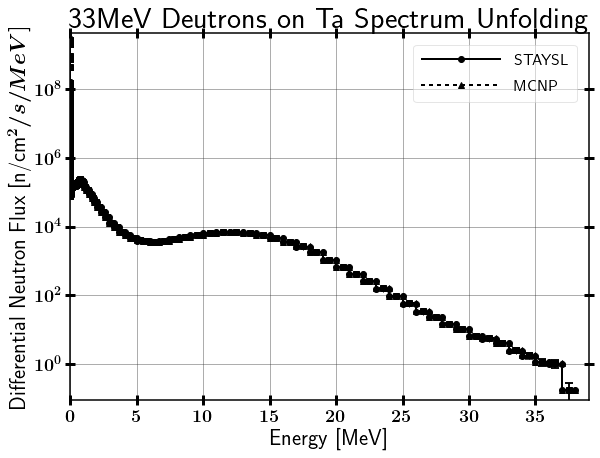

In [6]:
from DataAnalysis.Histograms import Histogram
import matplotlib
%matplotlib inline

outpath = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/ETA/'

adjDiffHisto = Histogram()
adjDiffHisto.build_histo(df['lowE'].tolist(), df['adjFlux'].tolist(), uncert=df['adjStd'].tolist(),
                     edgeLoc='low', name='STAYSL')

unadjDiffHisto = Histogram()
unadjDiffHisto.build_histo(df['lowE'].tolist(), df['unadjFlux'].tolist(), uncert=df['unadjStd'].tolist(),
                     edgeLoc='low', name='MCNP')

adjDiffHisto.plot(unadjDiffHisto, xMin=1E-6, logX=False, logY=True,
                  title='33MeV Deutrons on Ta Spectrum Unfolding',
                  xLabel='Energy [MeV]', yLabel='Differential Neutron Flux [n/cm^2/s/MeV]',
                  savePath=outpath+'33MeVTa_Staysl-Unfold_Differential')

Convert from differential spectrum and plot.

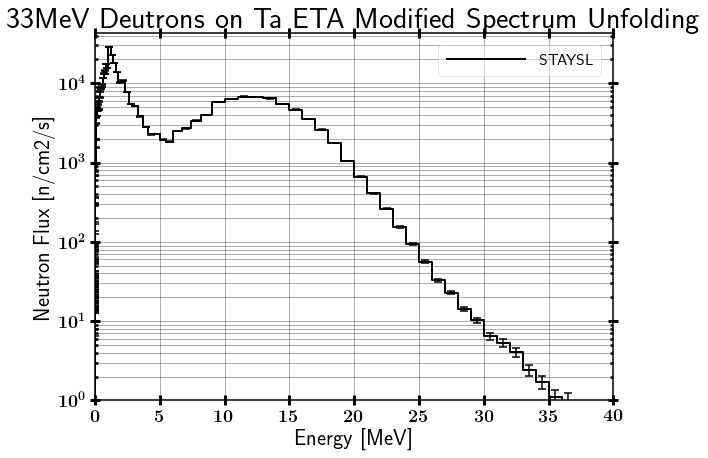

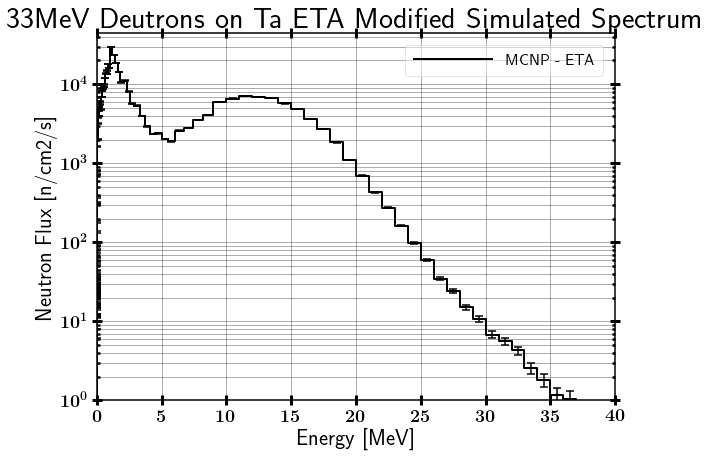

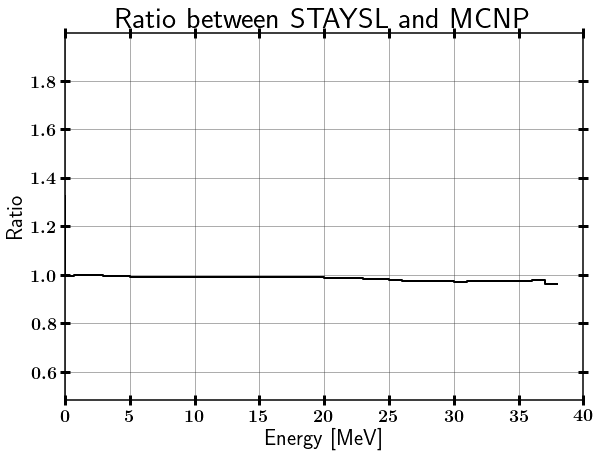

In [16]:
from DataAnalysis.DataManipulation import bin_integration

adjHisto = Histogram()
adjHisto.build_histo(df['lowE'].tolist(),
                     bin_integration(df['lowE'].tolist(), df['adjFlux'].tolist(), 'low'),
                     uncert=bin_integration(df['lowE'].tolist(), df['adjStd'].tolist(), 'low'),
                     edgeLoc='low', name='STAYSL')

adjHisto.plot(xMin=1E-6, xMax=40, yMin=1, logX=False, logY=True, includeMarkers=False,
              title='33MeV Deutrons on Ta ETA Modified Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]',
              savePath=outpath+'33MeVTa_Staysl-Unfold')

mcnpHisto = Histogram()
normFactor = 1.17E10 #6.35E7
tallyFrame['normTally'] = tallyFrame['tally'] * normFactor
tallyFrame['normUncertainty'] = tallyFrame['uncertainty'] * tallyFrame['normTally']
mcnpHisto.build_histo(tallyFrame['bin'].tolist(), tallyFrame['normTally'].tolist(), 
                       uncert=tallyFrame['normUncertainty'].tolist(), edgeLoc='up', name='MCNP - ETA')
mcnpHisto.plot(xMin=1E-6, xMax=40, yMin=1, logX=False, logY=True, includeMarkers=False,
               title='33MeV Deutrons on Ta ETA Modified Simulated Spectrum',
               xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]',
               savePath=outpath+'33MeVTa_MCNP')

ratioHisto = Histogram()
ratioHisto.build_histo(df['lowE'].tolist(), df['fluxRatio'].tolist(), edgeLoc='low')
ratioHisto.plot(xMin=1E-6, xMax=40, logX=False, logY=False, includeMarkers=False,
              title='Ratio between STAYSL and MCNP',
              xLabel='Energy [MeV]', yLabel='Ratio',
              savePath=outpath+'33MeVTa_Staysl-MCNP-Ratio')

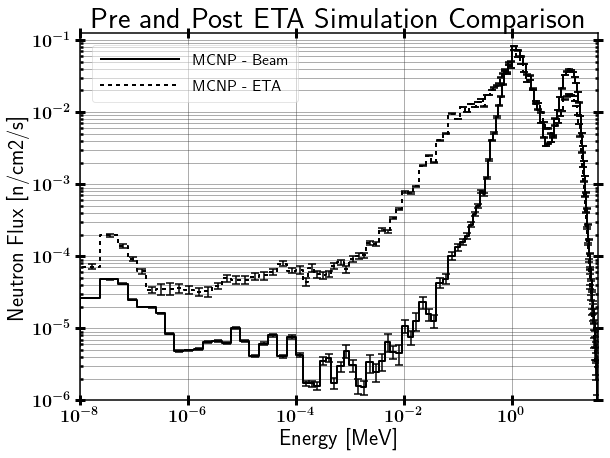

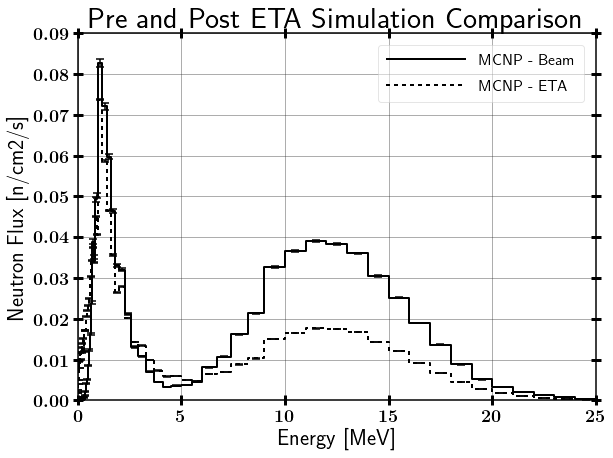

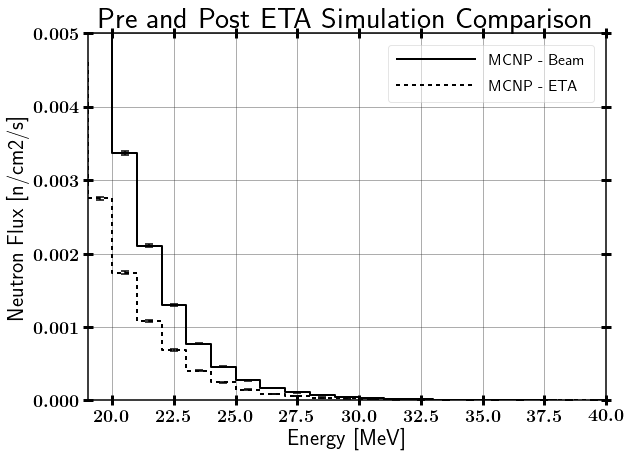

In [17]:
import numpy as np

path = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/Iteration3/stayslin.out'
beamDF = pd.read_table(path, engine='python', sep='\s+', skiprows=99, skipfooter=649, header=None,
                       names=['lowE', 'adjFlux', 'unadjFlux', 'fluxRatio', 'adjStd', 
                       'unadjStd', 'uncertRatio', 'integralFlux', 'intFluxUncert'])

beamDF.apply(pd.to_numeric)
beamDF['adjFlux'] = bin_integration(beamDF['lowE'].tolist(), beamDF['adjFlux'].tolist(), 'low')
beamDF['adjStd'] = beamDF['adjStd'] / 100
beamDF['normAdjFlux'] = beamDF['adjFlux'] / sum(beamDF['adjFlux'])
beamDF['normAdjStd'] = beamDF['adjStd'] * beamDF['normAdjFlux']

mcnpBeamNormHisto = Histogram()
mcnpBeamNormHisto.build_histo(beamDF['lowE'].tolist(), beamDF['normAdjFlux'].tolist(), 
                              uncert=beamDF['normAdjStd'].tolist(), edgeLoc='low',
                              name='MCNP - Beam')

mcnpETANormHisto = Histogram()
mcnpETANormHisto.build_histo(tallyFrame['bin'].tolist(), 
                             (tallyFrame['tally']* (1.0 / sum(tallyFrame['tally']))).tolist(), 
                             uncert=(tallyFrame['uncertainty']*tallyFrame['tally']*(1.0/sum(tallyFrame['tally']))).tolist(),
                             edgeLoc='up', name='MCNP - ETA')

mcnpBeamNormHisto.plot(mcnpETANormHisto, xMin=1E-8, xMax=40, yMin=1E-6, logX=True, logY=True, legendLoc=2,
                      includeMarkers=False, title='Pre and Post ETA Simulation Comparison',
                      xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]',
                      savePath=outpath+'33MeVTa_MCNP_NormComp_log')

mcnpBeamNormHisto.plot(mcnpETANormHisto, xMin=0, xMax=25, yMax=0.09, logX=False, logY=False, legendLoc=1,
                      includeMarkers=False, title='Pre and Post ETA Simulation Comparison',
                      xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]',
                      savePath=outpath+'33MeVTa_MCNP_NormComp_lin')

mcnpBeamNormHisto.plot(mcnpETANormHisto, xMin=19, xMax=40, yMin=1e-8, yMax=0.005, logX=False, logY=False,
                      includeMarkers=False, title='Pre and Post ETA Simulation Comparison',
                      xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]',
                      savePath=outpath+'33MeVTa_MCNP_Comp')

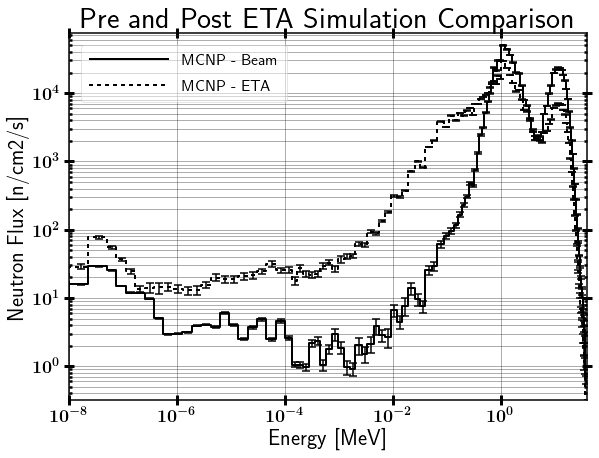

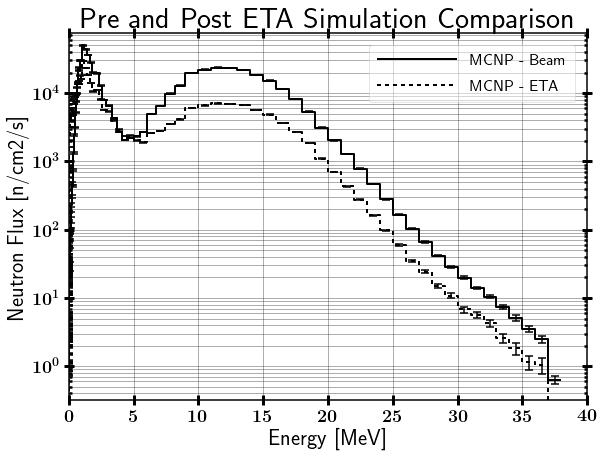

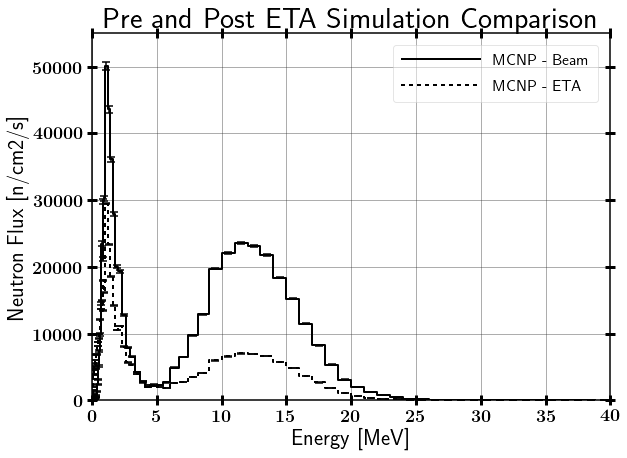

In [18]:
mcnpBeamHisto = Histogram()
mcnpBeamHisto.build_histo(beamDF['lowE'].tolist(), beamDF['adjFlux'].tolist(), 
                          uncert=(beamDF['adjStd']*beamDF['adjFlux']).tolist(), edgeLoc='low',
                          name='MCNP - Beam')

mcnpBeamHisto.plot(mcnpHisto, xMin=1E-8, xMax=40, logX=True, logY=True, legendLoc=2,
                   includeMarkers=False, title='Pre and Post ETA Simulation Comparison',
                   xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]',
                   savePath=outpath+'33MeVTa_MCNP_Comp_log')

mcnpBeamHisto.plot(mcnpHisto, xMin=1E-3, xMax=40, logX=False, logY=True,
                   includeMarkers=False, title='Pre and Post ETA Simulation Comparison',
                   xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]',
                   savePath=outpath+'33MeVTa_MCNP_Comp_semilog')

mcnpBeamHisto.plot(mcnpHisto, xMin=0, xMax=40, yMax=5.5E4, logX=False, logY=False,
                   includeMarkers=False, title='Pre and Post ETA Simulation Comparison',
                   xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]',
                   savePath=outpath+'33MeVTa_MCNP_Comp_lin')

### Iterative Solution #1:

  - No modifications are made to the MCNP results for the guess spectrum
  - It does update the uncertainty throughout the convergence process. 

In [19]:
from Unfolding.STAYSL import IterativeSTAYSL

stayslPath = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/ETA/STAYSL_PNNL/Iteration1/'

# Build Data Structure Lists
iterSoln = []
iterAdjHisto = []
iterRatioHisto = []

iterSoln.append(IterativeSTAYSL(stayslPath, updateStd=True, chiConv=.01))
print iterSoln[-1]

iterSoln[-1].run()

# Add to plot lists
iterAdjHisto.append(Histogram())
iterRatioHisto.append(Histogram())

IterativeSTYASL:
STAYSL Path: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/ETA/STAYSL_PNNL/Iteration1/
$\chi^2$ Convergence: 0.01
Flux Std  Convergence: 0.1
Update Flux Std Each Iteration: True
Number of Energy Groups: 140

The file exists at: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/ETA/STAYSL_PNNL/Iteration1/stayslin.out
Chi^2 = 21.49735, Std Norm = 0.857739243593
Chi^2 = 21.4319
Chi^2 = 21.37251
Chi^2 = 21.3175
Chi^2 = 21.26532
Chi^2 = 21.21499
Chi^2 = 21.16716
Chi^2 = 21.12
Chi^2 = 21.075
Chi^2 = 21.03048
Chi^2 = 20.98673
Chi^2 = 20.9446
Chi^2 = 20.90277
Chi^2 = 20.86125
Chi^2 = 20.82074
Chi^2 = 20.78044
Chi^2 = 20.74068
Chi^2 = 20.70109
Chi^2 = 20.66167
Chi^2 = 20.62281
Chi^2 = 20.584
Chi^2 = 20.54599
Chi^2 = 20.50864
Chi^2 = 20.47178
Chi^2 = 20.43506
Chi^2 = 20.39891
Chi^2 = 20.36279
Chi^2 = 20.32696
Chi^2 = 20.29149
Chi^2 = 20.25659
Chi^2 = 20.22227
Chi^2 = 20.18736
Chi^2 

Chi^2 = 11.55867
Chi^2 = 11.54658
Chi^2 = 11.53422
Chi^2 = 11.52182
Chi^2 = 11.50947
Chi^2 = 11.49781
Chi^2 = 11.48573
Chi^2 = 11.47366
Chi^2 = 11.46157
Chi^2 = 11.44926
Chi^2 = 11.43703
Chi^2 = 11.42488
Chi^2 = 11.41259
Chi^2 = 11.40071
Chi^2 = 11.38882
Chi^2 = 11.37707
Chi^2 = 11.3651
Chi^2 = 11.35321
Chi^2 = 11.34145
Chi^2 = 11.32965
Chi^2 = 11.31759
Chi^2 = 11.30557
Chi^2 = 11.29354
Chi^2 = 11.28226
Chi^2 = 11.27044
Chi^2 = 11.2588
Chi^2 = 11.24707
Chi^2 = 11.23537
Chi^2 = 11.22365
Chi^2 = 11.21201
Chi^2 = 11.20069
Chi^2 = 11.18893
Chi^2 = 11.17729
Chi^2 = 11.16606
Chi^2 = 11.15469
Chi^2 = 11.14328
Chi^2 = 11.13171
Chi^2 = 11.12024
Chi^2 = 11.10888
Chi^2 = 11.09741
Chi^2 = 11.08577
Chi^2 = 11.0744
Chi^2 = 11.06324
Chi^2 = 11.05176
Chi^2 = 11.04083
Chi^2 = 11.02938
Chi^2 = 11.01824
Chi^2 = 11.00701
Chi^2 = 10.99597
Chi^2 = 10.98456
Chi^2 = 10.9734
Chi^2 = 10.96237
Chi^2 = 10.95117
Chi^2 = 10.94013
Chi^2 = 10.92902
Chi^2 = 10.91795
Chi^2 = 10.90749
Chi^2 = 10.89653
Chi^2 = 10.88544
C

Beam TotalFluence = 2.712692e+05
MCNP ETA TotalFluence = 3.990207e+05
STAYSL ETA TotalFluence = 4.591676e+05


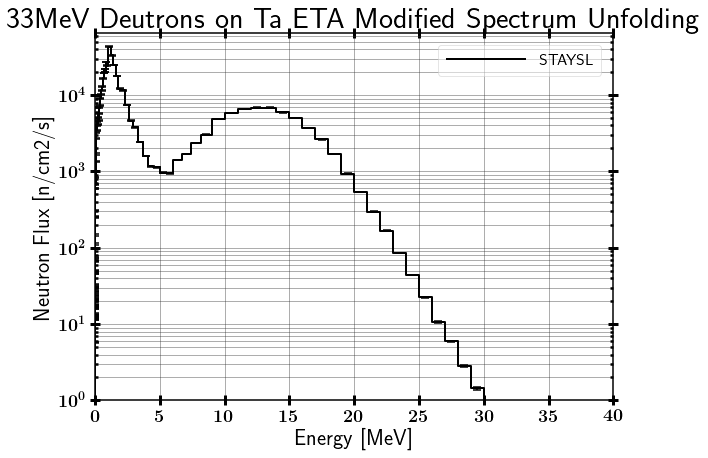

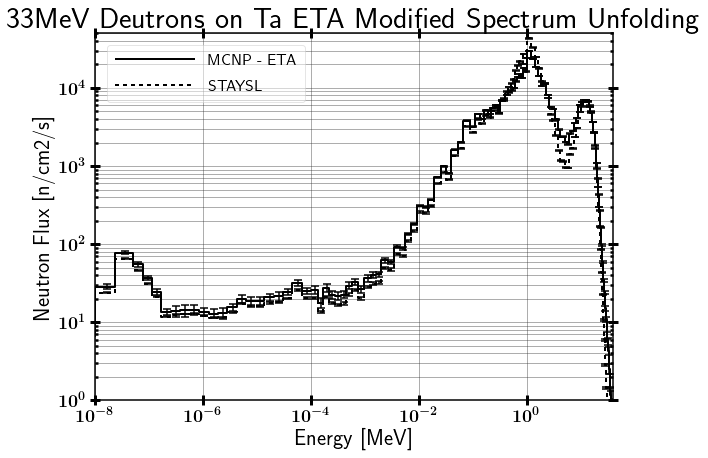

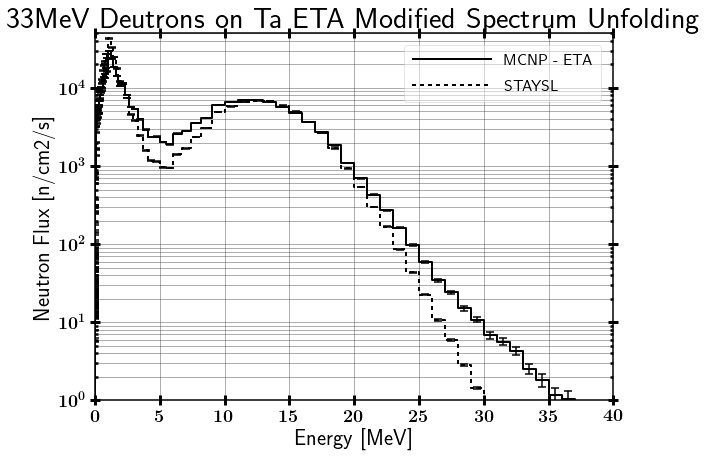

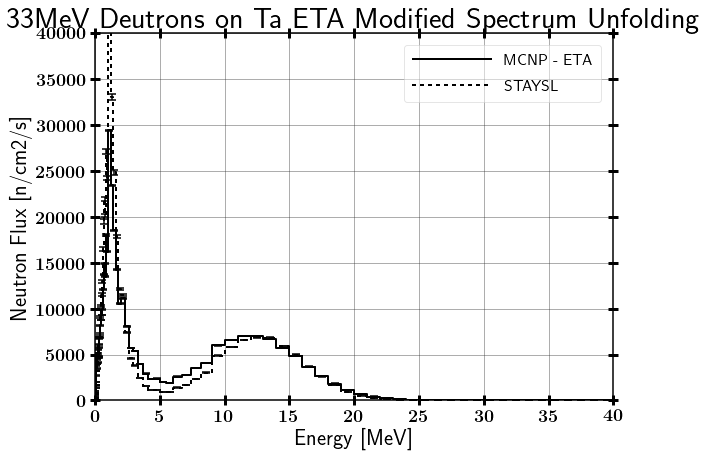

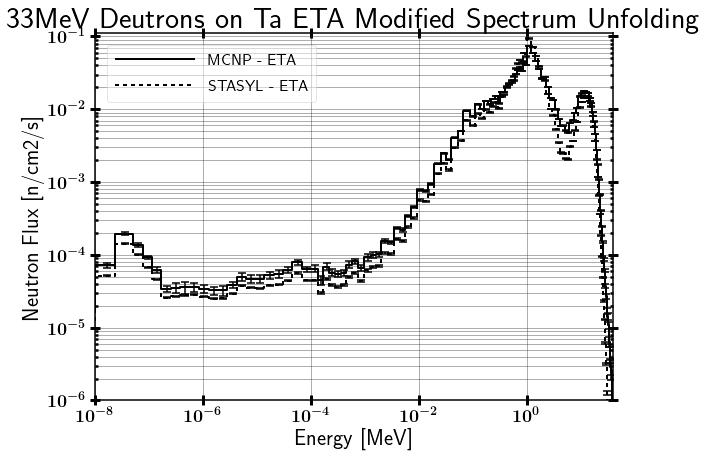

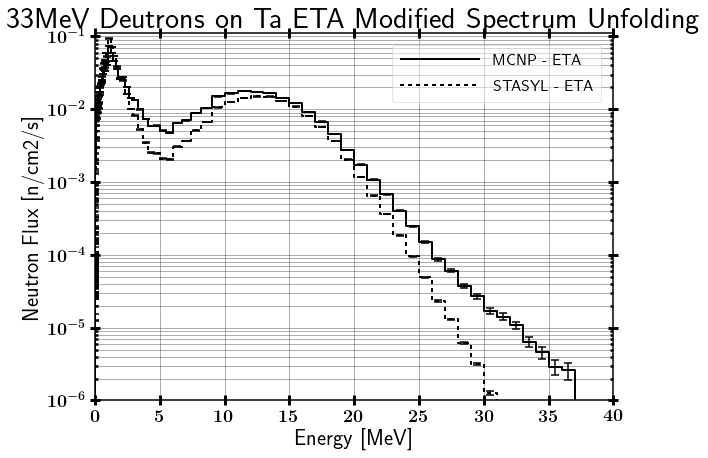

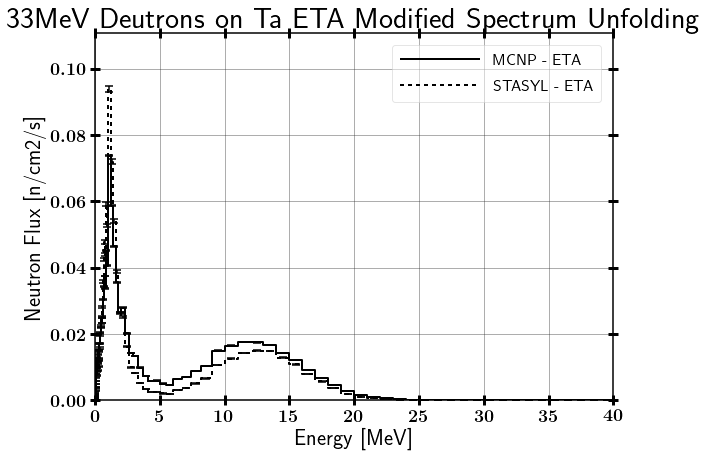

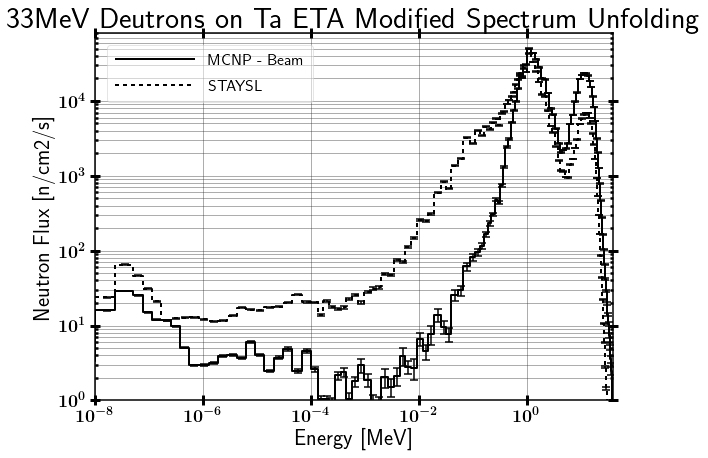

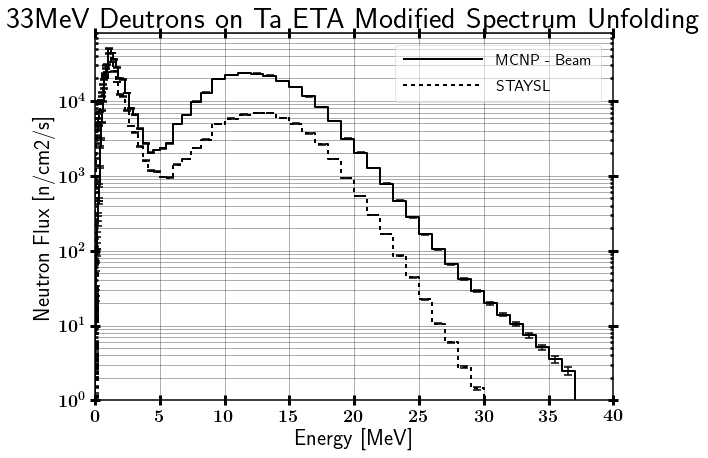

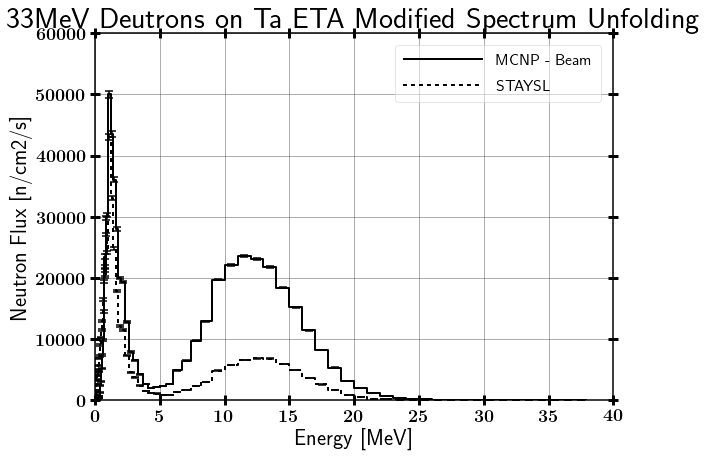

In [20]:
iter = 0

iterAdjHisto[iter].build_histo(iterSoln[iter]._df['lowE'].tolist(),iterSoln[iter]._df['adjFlux'].tolist(),
                             uncert=(iterSoln[iter]._df['adjStd']*iterSoln[iter]._df['adjFlux']).tolist(),
                             edgeLoc='low', name='STAYSL')

print "Beam TotalFluence = {:2e}".format(sum(bin_integration(beamDF['lowE'].tolist(), beamDF['adjFlux'].tolist(), 'low')))
print "MCNP ETA TotalFluence = {:2e}".format(sum(tallyFrame['normTally']))
print "STAYSL ETA TotalFluence = {:2e}".format(sum(iterSoln[iter]._df['adjFlux']))

iterAdjHisto[iter].plot(xMin=1E-6, xMax=40, yMin=1, logX=False, logY=True, includeMarkers=False,
              title='33MeV Deutrons on Ta ETA Modified Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]',
              savePath=outpath+'33MeVTa_Staysl-Unfold_Itr{:1d}'.format(iter))

# Plot comparison of MCNP simulation for ETA to STAYSL ETA unfold
mcnpHisto.plot(iterAdjHisto[iter], xMin=1E-8, xMax=40, yMin=1, yMax=5E4, logX=True, logY=True, includeMarkers=False,
              title='33MeV Deutrons on Ta ETA Modified Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]', legendLoc=2,
              savePath=outpath+'33MeVTa_ETA_Comp-Sim-Exp_log')
mcnpHisto.plot(iterAdjHisto[iter], xMin=1E-6, xMax=40, yMin=1, yMax=5E4, logX=False, logY=True, includeMarkers=False,
              title='33MeV Deutrons on Ta ETA Modified Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]',
              savePath=outpath+'33MeVTa_ETA_Comp-Sim-Exp_semilog')
mcnpHisto.plot(iterAdjHisto[iter], xMin=1E-6, xMax=40, yMin=1, yMax=4E4, logX=False, logY=False, includeMarkers=False,
              title='33MeV Deutrons on Ta ETA Modified Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]',
              savePath=outpath+'33MeVTa_ETA_Comp-Sim-Exp_lin')

# Plot normalized comparison of MCNP simulation for ETA to STAYSL ETA unfold
etaNormHisto = Histogram()
iterSoln[iter]._df['normAdjFlux'] = iterSoln[iter]._df['adjFlux'] / sum(iterSoln[iter]._df['adjFlux'])
iterSoln[iter]._df['normAdjStd'] = iterSoln[iter]._df['adjStd'] *iterSoln[iter]._df['normAdjFlux']
etaNormHisto.build_histo(iterSoln[iter]._df['lowE'].tolist(), iterSoln[iter]._df['normAdjFlux'].tolist(), 
                              uncert=iterSoln[iter]._df['normAdjStd'].tolist(), edgeLoc='low',
                              name='STASYL - ETA')
mcnpETANormHisto.plot(etaNormHisto, xMin=1E-8, xMax=40, yMin=1E-6, logX=True, logY=True, includeMarkers=False,
              title='33MeV Deutrons on Ta ETA Modified Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]', legendLoc=2,
              savePath=outpath+'33MeVTa_ETA_NormComp-Sim-Exp_log')
mcnpETANormHisto.plot(etaNormHisto, xMin=1E-6, xMax=40, yMin=1E-6, logX=False, logY=True, includeMarkers=False,
              title='33MeV Deutrons on Ta ETA Modified Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]',
              savePath=outpath+'33MeVTa_ETA_NormComp-Sim-Exp_semilog')
mcnpETANormHisto.plot(etaNormHisto, xMin=1E-6, xMax=40, logX=False, logY=False, includeMarkers=False,
              title='33MeV Deutrons on Ta ETA Modified Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]',
              savePath=outpath+'33MeVTa_ETA_NormComp-Sim-Exp_lin')

# Plot comparison of measured Beam to measured ETA spectrum obtained froms STAYSL unfolds
mcnpBeamHisto.plot(iterAdjHisto[iter], xMin=1E-8, xMax=40, yMin=1, yMax=8E4, logX=True, logY=True, includeMarkers=False,
              title='33MeV Deutrons on Ta ETA Modified Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]', legendLoc=2)
mcnpBeamHisto.plot(iterAdjHisto[iter], xMin=1E-6, xMax=40, yMin=1, yMax=8E4, logX=False, logY=True, includeMarkers=False,
              title='33MeV Deutrons on Ta ETA Modified Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]')
mcnpBeamHisto.plot(iterAdjHisto[iter], xMin=1E-6, xMax=40, yMin=1, yMax=6E4, logX=False, logY=False, includeMarkers=False,
              title='33MeV Deutrons on Ta ETA Modified Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]')

#iterRatioHisto[iter].build_histo(iterSoln[iter]._df['lowE'].tolist(), iterSoln[iter]._df['fluxRatio'].tolist(), edgeLoc='low')
#iterRatioHisto[iter].plot(xMin=1E-6, xMax=40, logX=False, logY=False, includeMarkers=False,
#              title='Ratio between STAYSL and MCNP', xLabel='Energy [MeV]', yLabel='Ratio',
#              savePath=outpath+'33MeVTa_Staysl-MCNP-Ratio_Itr{:1d}'.format(iter))

### Iterative Solution #2:

  - A uniform spectrum of 5E-7 with 100% uncertainty is used.
  - It does update the uncertainty throughout the convergence process. 

In [ ]:
stayslPath = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/ETA/STAYSL_PNNL/Iteration2/'

iterSoln.append(IterativeSTAYSL(stayslPath, updateStd=True, chiConv=0.01))
print iterSoln[-1]

iterSoln[-1].run()

# Add to plot lists
iterAdjHisto.append(Histogram())
iterRatioHisto.append(Histogram())

In [ ]:
iter = 1

iterAdjHisto[iter].build_histo(iterSoln[iter]._df['lowE'].tolist(),iterSoln[iter]._df['adjFlux'].tolist(),
                             uncert=(iterSoln[iter]._df['adjStd']*iterSoln[iter]._df['adjFlux']).tolist(),
                             edgeLoc='low', name='STAYSL')

iterAdjHisto[iter].plot(xMin=1E-6, xMax=40, yMin=1, logX=False, logY=True, includeMarkers=False,
              title='33MeV Deutrons on Ta ETA Modified Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]',
              savePath=outpath+'33MeVTa_Staysl-Unfold_Itr{:1d}'.format(iter))

mcnpHisto.plot(iterAdjHisto[iter], xMin=1E-6, xMax=40, yMin=1, yMax=5E4, logX=True, logY=True, includeMarkers=False,
              title='33MeV Deutrons on Ta ETA Modified Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]', legendLoc=2)
mcnpHisto.plot(iterAdjHisto[iter], xMin=1E-6, xMax=40, yMin=1, yMax=5E4, logX=False, logY=True, includeMarkers=False,
              title='33MeV Deutrons on Ta ETA Modified Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]')
mcnpHisto.plot(iterAdjHisto[iter], xMin=1E-6, xMax=40, yMin=1, yMax=4E4, logX=False, logY=False, includeMarkers=False,
              title='33MeV Deutrons on Ta ETA Modified Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]')

iterRatioHisto[iter].build_histo(iterSoln[iter]._df['lowE'].tolist(), iterSoln[iter]._df['fluxRatio'].tolist(), edgeLoc='low')
iterRatioHisto[iter].plot(xMin=1E-6, xMax=40, logX=False, logY=False, includeMarkers=False,
              title='Ratio between STAYSL and MCNP', xLabel='Energy [MeV]', yLabel='Ratio',
              savePath=outpath+'33MeVTa_Staysl-MCNP-Ratio_Itr{:1d}'.format(iter))